In [1]:
from kitts import config
from kitts.utils import dataset_utils, data_vision
from kitts.dcl import collect_content, annotate_content
from kitts.core.model import model_builder

In [2]:
# importing the excel file
bdf = dataset_utils.accumulate_dataframe()
bdf = dataset_utils.condition_labels(bdf)
# getting the shape
bdf.shape
#data.columns

Source Path exists: C:\Docs\kitts\data\annotated
Combined 19 files into one dataframe


(3867, 21)

In [3]:
Tokenizer = model_builder.Tokenizer(bdf)
tokenized_label = Tokenizer.tokenize()

In [4]:
#Word2vec Calling Model & Training
w2vmodel = model_builder.Word2Vectorize(bdf)
smodel = w2vmodel.get_model()
#tokenized_label = w2vmodel.tokenize()

#uncomment below to train model again
#smodel = w2vmodel.train_model(tokenized_label, max_features=100)

In [5]:
w2vmodel.get_similar_words("red-sky-at-morning")
#w2vmodel.get_similar_words("pizza")

[('sunrise', 0.9127129912376404),
 ('afterglow', 0.8336650133132935),
 ('sunset', 0.8234502673149109),
 ('mesh', 0.7985267043113708),
 ('sailboat', 0.7413294911384583),
 ('cumulus', 0.7307971119880676),
 ('overhead-power-line', 0.7004973292350769),
 ('sunlight', 0.6788167357444763),
 ('atmosphere', 0.672841489315033),
 ('mast', 0.6655844449996948)]

In [6]:
feature_names, feature_vectors = w2vmodel.vectorize(tokenized_label)

In [7]:
cl = model_builder.kittsCluster(feature_vectors,feature_names)

In [8]:
cluster, cluster_labels = cl.mbkmeans_clusters(n = 15, batch_size = 50, print_silhouette_val = True)

For n_clusters = 15
Silhouette coefficient: 0.18
Inertia:14743.228580353734
Silhouette values:
    Cluster 1: Size:278 | Avg:0.57 | Min:0.14 | Max: 0.70
    Cluster 6: Size:140 | Avg:0.34 | Min:0.03 | Max: 0.54
    Cluster 10: Size:140 | Avg:0.27 | Min:0.03 | Max: 0.48
    Cluster 13: Size:139 | Avg:0.25 | Min:0.01 | Max: 0.44
    Cluster 14: Size:101 | Avg:0.23 | Min:-0.10 | Max: 0.45
    Cluster 2: Size:261 | Avg:0.20 | Min:0.05 | Max: 0.38
    Cluster 7: Size:148 | Avg:0.20 | Min:-0.02 | Max: 0.42
    Cluster 11: Size:134 | Avg:0.19 | Min:-0.02 | Max: 0.41
    Cluster 5: Size:308 | Avg:0.15 | Min:-0.06 | Max: 0.36
    Cluster 0: Size:283 | Avg:0.13 | Min:-0.07 | Max: 0.34
    Cluster 4: Size:583 | Avg:0.13 | Min:-0.01 | Max: 0.31
    Cluster 12: Size:409 | Avg:0.11 | Min:-0.10 | Max: 0.33
    Cluster 3: Size:430 | Avg:0.09 | Min:-0.07 | Max: 0.29
    Cluster 9: Size:256 | Avg:0.08 | Min:-0.11 | Max: 0.30
    Cluster 8: Size:257 | Avg:0.06 | Min:-0.10 | Max: 0.26


In [10]:
cluster_words = w2vmodel.display_wv_cluster_words(cluster = cluster,words_in_clusters = 10)

Most representative terms per cluster (based on centroids):
***********************************
Cluster 0: arcade column official-residence building-material arch dome landmark facade vault roof 
***********************************
Cluster 1: meyer-lemon rotini rice fusilli salad marinara-sauce fines-herbes stew mixture corn 
***********************************
Cluster 2: ecoregion nature fluvial-landforms-of-streams water-resources natural-environment highland natural-landscape vegetation waterfall plant-community 
***********************************
Cluster 3: architecture daytime nature lighting infrastructure building window street-light umbrella property 
***********************************
Cluster 4: landmark cityscape metropolis metropolitan-area facade roof urban-design city architecture residential-area 
***********************************
Cluster 5: cool dress standing stole tartan leg one-piece-garment waist trench-coat street-fashion 
***********************************
Clu

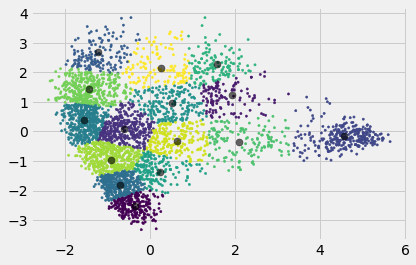

In [11]:
cl.display_wv_cluster_2D(cluster)

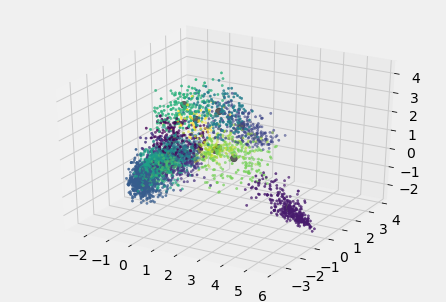

In [12]:
cl.display_wv_cluster_3D(cluster)

In [13]:
cl.clustered_data(cluster,data=bdf)

file created and saved at C:\Docs\kitts\data\clustered\kmeans_Cluster_Data.csv
